<a href="https://colab.research.google.com/github/dolinh11/Capstone_DigitalTwin/blob/master/VinUni_Capstone_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS OF SIMULATION DATA GENERATED FROM GAMA EXPEREMENTS**

This Notebook is developed to analyze the simulated data from GAMA about EV charging infrastructure at VinUni campus.
- Developed by: Nguyen Quang Truong & Do Bui Khanh Linh
- Start from Dec 2023.

In [1]:
!rm -r Capstone_DigitalTwin/
!git clone https://github.com/dolinh11/Capstone_DigitalTwin.git

rm: cannot remove 'Capstone_DigitalTwin/': No such file or directory
Cloning into 'Capstone_DigitalTwin'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 225 (delta 8), reused 10 (delta 2), pack-reused 192
Receiving objects: 100% (225/225), 3.04 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (83/83), done.


# Sobol Analysis

This Sobol analysis is used to analyze the dependence of output variances on input parameters.
In our model, there are **3 outputs (indicators)** and **6 input parameters**.

The data for input and output values are generated by **'sobol' experiment** in GAMA file.

In [2]:
#install Sensitivity Analysis (SA) library
!pip install SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

# Load the data
data = pd.read_csv('Capstone_DigitalTwin/simulation_data/sobol_raw.csv')
#data.to_csv('sobol_data.csv') #save to csv file

X = data[data.columns[:6]].values

Y1 = data[data.columns[6]].values # The 7th column for avg_statisfied_day
Y2 = data[data.columns[7]].values # The 8th column for monthly_energy_consumption
Y3 = data[data.columns[8]].values # The 9th column for monthly_profit

# change true, false to 1 and 0
data['policy_prohibit_parking'] = data['policy_prohibit_parking'].map({'TRUE': 1, 'FALSE': 0})
data['policy_force_moving'] = data['policy_force_moving'].map({'TRUE': 1, 'FALSE': 0})


In [4]:
problem = {
  'num_vars': 6,
  'names': ['nb_electrical', 'nb_gasoline', 'nb_activeCS_Cparking','nb_activeCS_Jparking','policy_prohibit_parking','policy_force_moving'],
  'bounds': [[10, 60],
             [35, 80],
             [6, 30],
             [6, 30],
             [0, 1],
             [0, 1]]
}

In [5]:
# Perform analysis
Si1 = sobol.analyze(problem, Y1, print_to_console=True) #indicator 1
Si2 = sobol.analyze(problem, Y2, print_to_console=True) #indicator 2
Si3 = sobol.analyze(problem, Y3, print_to_console=True) #indicator 3

                               ST   ST_conf
nb_electrical            0.457489  0.050624
nb_gasoline              0.322437  0.038473
nb_activeCS_Cparking     0.500904  0.060205
nb_activeCS_Jparking     0.289137  0.040835
policy_prohibit_parking  0.501737  0.058084
policy_force_moving      0.209442  0.031422
                               S1   S1_conf
nb_electrical            0.116243  0.055300
nb_gasoline              0.053433  0.053154
nb_activeCS_Cparking     0.130078  0.054102
nb_activeCS_Jparking    -0.010494  0.047511
policy_prohibit_parking  0.333337  0.058550
policy_force_moving      0.014174  0.035136
                                                       S2   S2_conf
(nb_electrical, nb_gasoline)                    -0.065649  0.073913
(nb_electrical, nb_activeCS_Cparking)           -0.051808  0.070308
(nb_electrical, nb_activeCS_Jparking)           -0.035400  0.074800
(nb_electrical, policy_prohibit_parking)        -0.029264  0.068180
(nb_electrical, policy_force_moving)        

In [6]:
import matplotlib.pyplot as plt
S1_indices = Si1['S1']
ST_indices = Si1['ST']
# confidence interval
S1_conf = Si1['S1_conf']
ST_conf = Si1['ST_conf']
# error bar = 1/2 confidence interval
S1_error = [conf / 2 for conf in S1_conf]
ST_error = [conf / 2 for conf in ST_conf]
# Colors for S1 indices
#colors_S1 = ['red' if x < 0 else 'blue' for x in S1_indices]

# Colors for ST indices
#colors_ST = ['red' if x < 0 else 'green' for x in ST_indices]

#variables = problem['names'] #use default variables name in the data file
variables = ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6']
#variables = ['No. electric cars', 'No. gasoline cars', 'No. active charging ports at building C', 'No. active charging ports at building J', 'Policy Level 1: Banning gasoline cars from occupying active charging stations', 'Policy Level 2: Requiring EVs to relocate to inactive charging stations once fully charged']

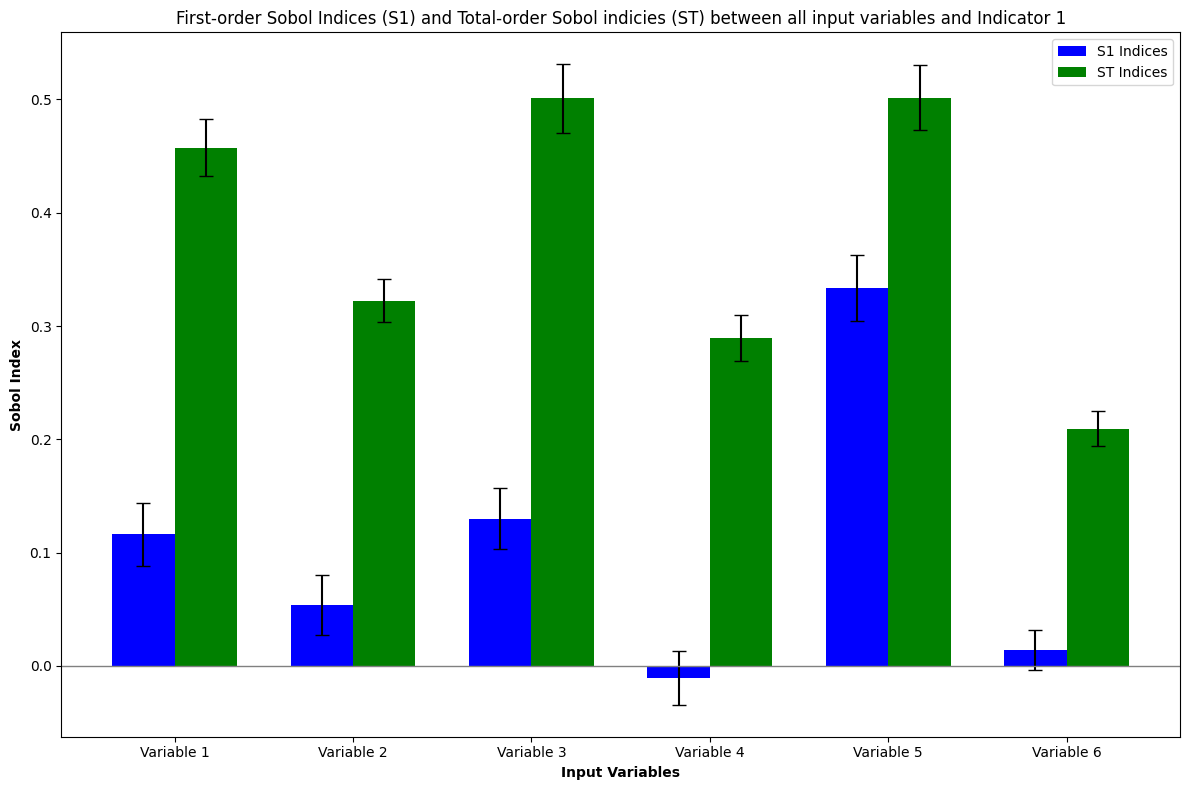

In [7]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars
x_positions = np.arange(len(variables))

plt.figure(figsize=(12, 8))

# Plotting S1 indices
plt.bar(x_positions - bar_width/2, S1_indices, yerr=S1_error, color = 'blue',width=bar_width, capsize=5, label='S1 Indices')

# Plotting ST indices
plt.bar(x_positions + bar_width/2, ST_indices, yerr=ST_error, color = 'green', width=bar_width, capsize=5, label='ST Indices')

plt.axhline(y=0, color='grey', lw=1)  # Add a horizontal line at y=0 for reference

# Set the x-axis to display the variable names
plt.xticks(x_positions, variables)

plt.title('First-order Sobol Indices (S1) and Total-order Sobol indicies (ST) between all input variables and Indicator 1')
plt.ylabel('Sobol Index', fontweight='bold')
plt.xlabel('Input Variables', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

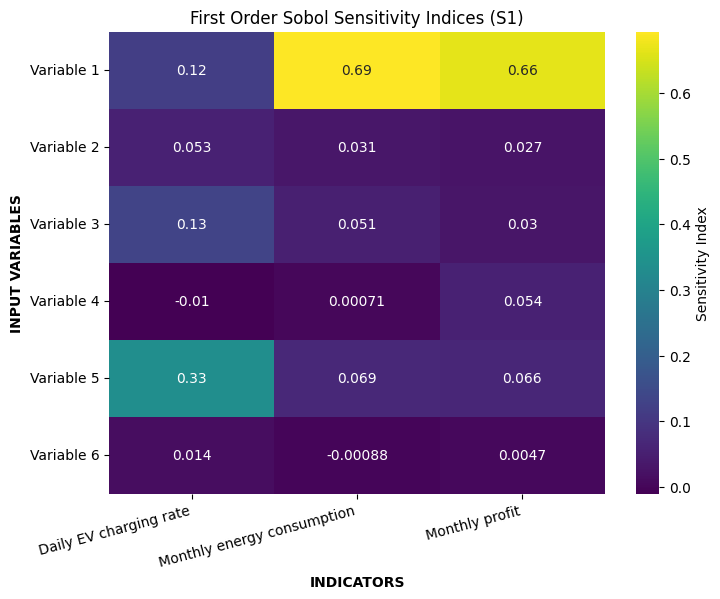

In [8]:
Si_list = [Si1, Si2, Si3]
output_names = ['Daily EV charging rate', 'Monthly energy consumption', 'Monthly profit']
#variables = problem['names']

# Prepare data for heatmap
data_for_heatmap = []
for Si in Si_list:
    S1_indices = Si['S1']
    data_for_heatmap.append(S1_indices)

# Convert to DataFrame
df = pd.DataFrame(data_for_heatmap, index=output_names, columns=variables).T

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': 'Sensitivity Index'})
# Rotate x-axis labels if they are long
plt.xticks(rotation=15, ha='right')  # Adjust angle as needed
plt.yticks(rotation=0, ha='right')  # Adjust angle as needed
plt.title('First Order Sobol Sensitivity Indices (S1)')
plt.ylabel('INPUT VARIABLES',fontweight='bold')
plt.xlabel('INDICATORS',fontweight='bold')
plt.show()

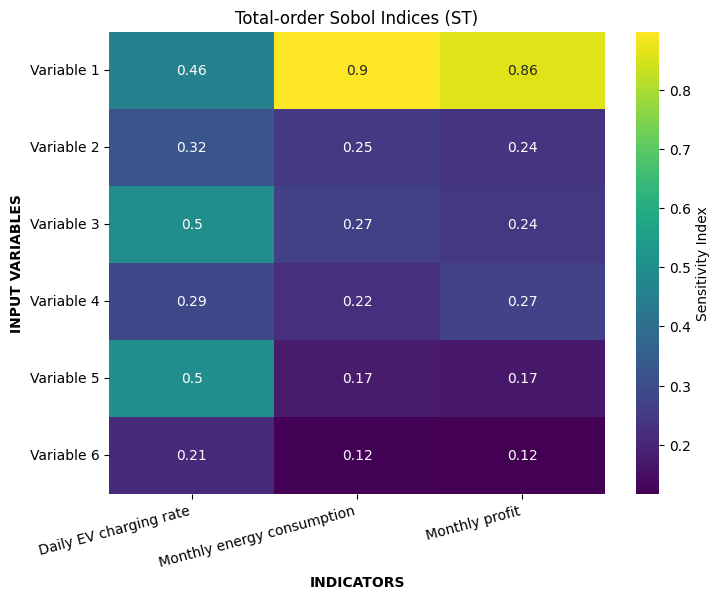

In [9]:
# Prepare data for heatmap
data_for_heatmap = []
for Si in Si_list:
    ST_indices = Si['ST']
    data_for_heatmap.append(ST_indices)

# Convert to DataFrame
df = pd.DataFrame(data_for_heatmap, index=output_names, columns=variables).T

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': 'Sensitivity Index'})
# Rotate x-axis labels if they are long
plt.xticks(rotation=15, ha='right')  # Adjust angle as needed
plt.yticks(rotation=0, ha='right')  # Adjust angle as needed
plt.title('Total-order Sobol Indices (ST)')
plt.ylabel('INPUT VARIABLES',fontweight='bold')
plt.xlabel('INDICATORS',fontweight='bold')
plt.show()

# Alternative 1 Effectiveness

This part analyzes the effectiveness of Alternative (1) - Activating more charging stations on VinUni's EV Infrastructures, indicated by 3 indicators.

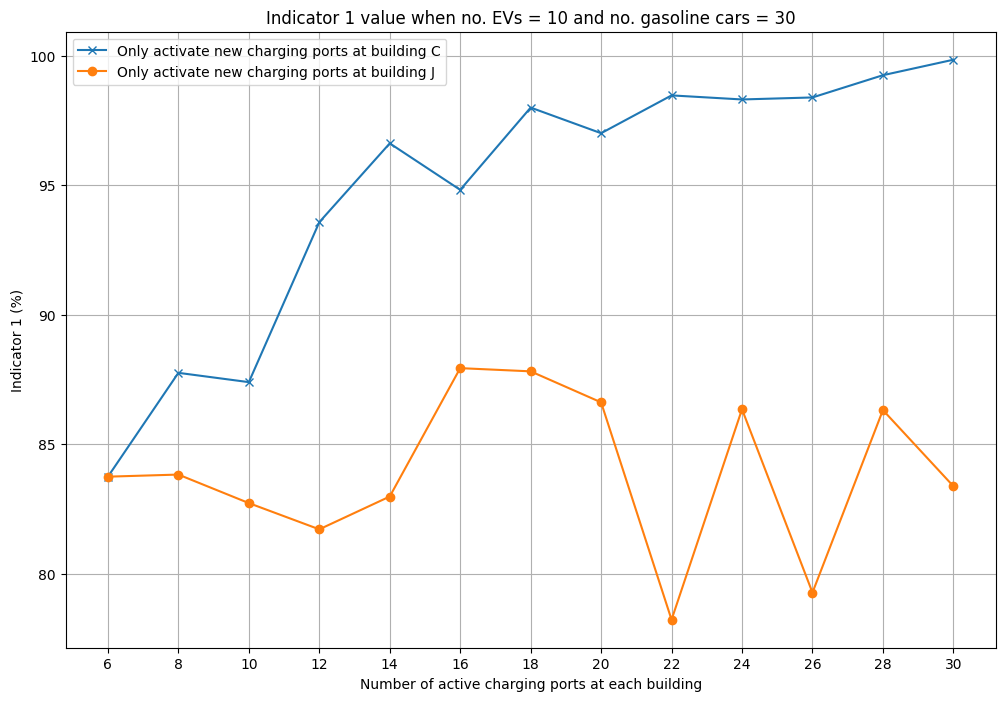

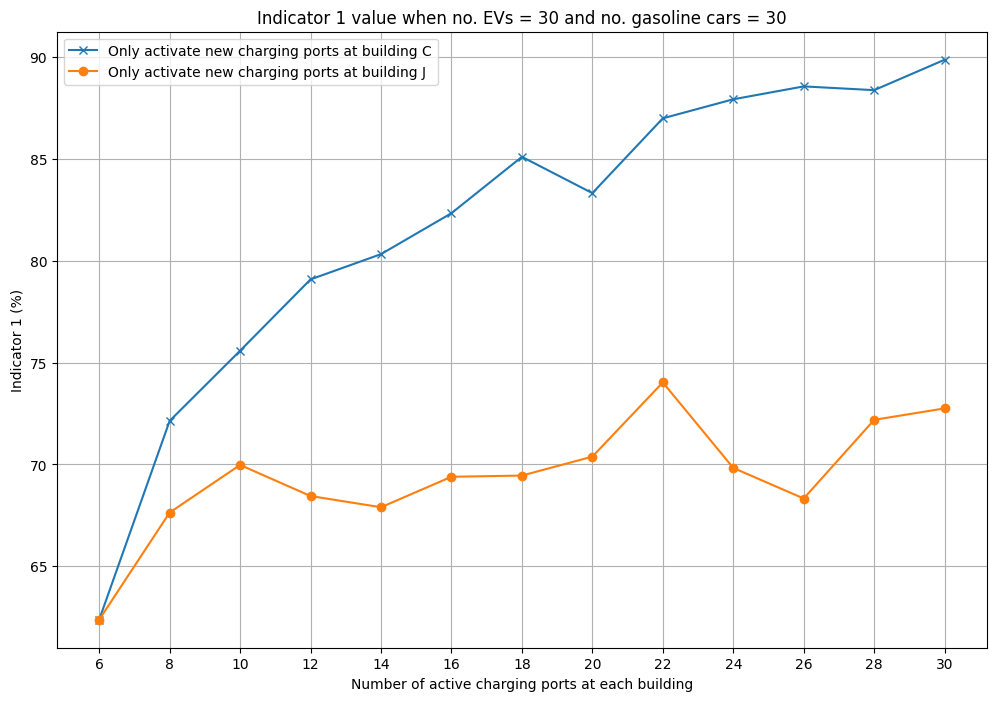

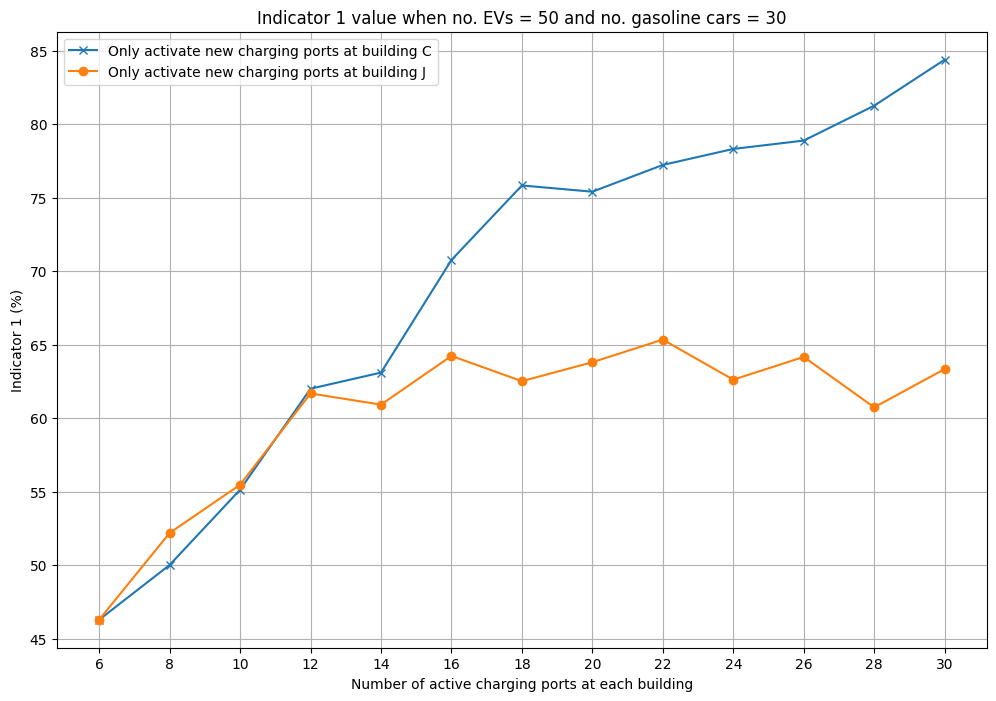

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the first dataset
df = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter1_indi1_CJ.csv')
df = df.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

input1_values = [10,30,50]

for input1 in input1_values:
    # Subset for the first dataset
    subset1 = df[(df['nb_electrical'] == input1) & (df['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    # Subset for the second dataset
    subset2 = df[(df['nb_electrical'] == input1) & (df['nb_activeCS_Cparking'] == 6)]
    mean_output2 = subset2.groupby('nb_activeCS_Jparking').mean(numeric_only=True).reset_index()

    # Subset for the new dataset where nb_activeCS_Cparking equals nb_activeCS_Jparking
    subset3 = df[(df['nb_electrical'] == input1) & (df['nb_activeCS_Cparking'] == df['nb_activeCS_Jparking'])]
    mean_output3 = subset3.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    # Plot for the first dataset
    plt.figure(figsize=(12, 8))
    plt.plot(mean_output1['nb_activeCS_Cparking'], 100*mean_output1['avg_statisfied_day'], marker='x', label='Only activate new charging ports at building C')

    # Plot for the second dataset
    plt.plot(mean_output2['nb_activeCS_Jparking'], 100*mean_output2['avg_statisfied_day'], marker='o', label='Only activate new charging ports at building J')

    # Plot for the new dataset
    #plt.plot(mean_output3['nb_activeCS_Cparking'], 100*mean_output3['avg_statisfied_day'], marker='*', linestyle='-', label='Activate new charging ports at building C and J')

    plt.xlabel('Number of active charging ports at each building')
    plt.ylabel('Indicator 1 (%)')
    plt.title(f'Indicator 1 value when no. EVs = {input1} and no. gasoline cars = 30')
    plt.xticks(range(6, 32, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    plt.legend()
    plt.grid(True)
    plt.show()

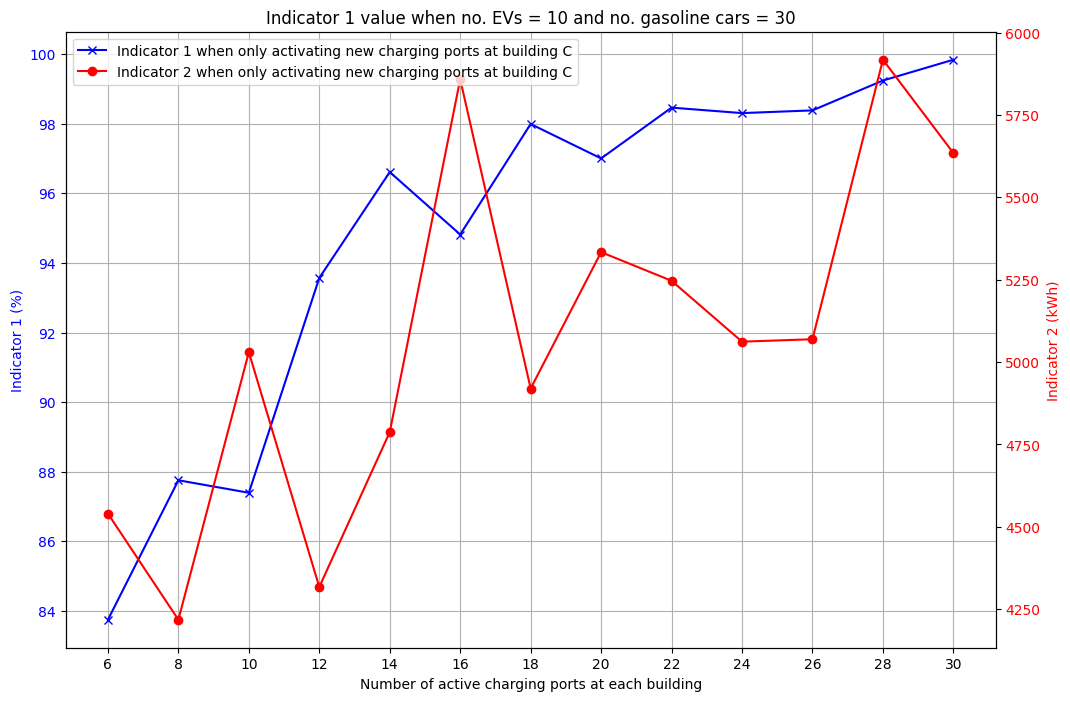

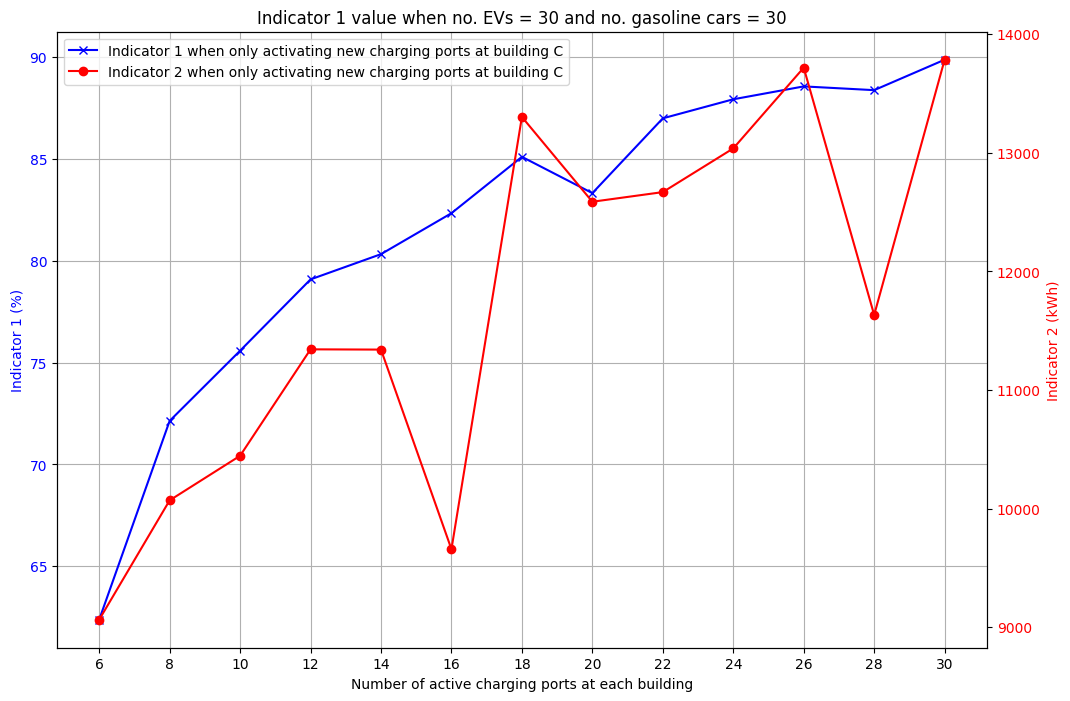

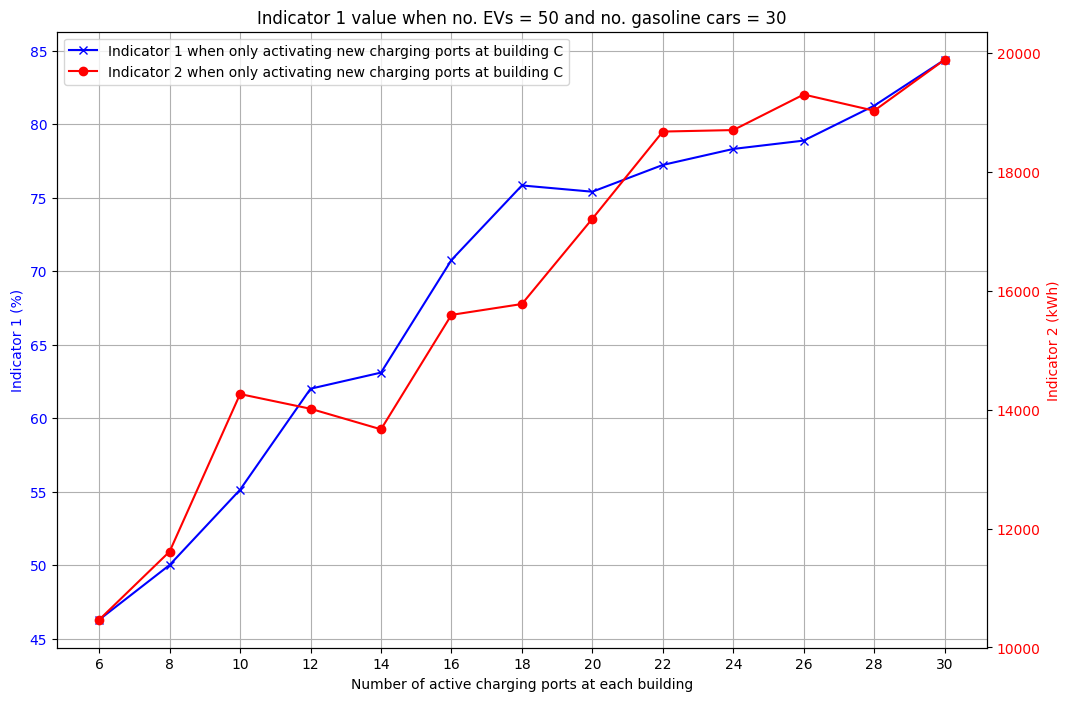

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the new dataset
df = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter1_indi1_CJ.csv')
df = df.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df1 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_False_False.csv')
df1 = df1.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})
input1_values = [10, 30, 50]

for input1 in input1_values:
    subset = df[(df['nb_electrical'] == input1) & (df['nb_activeCS_Jparking'] == 6)]
    mean_output = subset.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset1 = df1[(df1['nb_electrical'] == input1) & (df1['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()


    plt.figure(figsize=(12, 8))

    # Create the first plot with the first y-axis
    ax1 = plt.gca()  # Get the current Axes instance on the current figure
    ax1.plot(mean_output['nb_activeCS_Cparking'], 100*mean_output['avg_statisfied_day'], marker='x', color='blue', label='Indicator 1 when only activating new charging ports at building C')
    ax1.set_xlabel('Number of active charging ports at each building')
    ax1.set_ylabel('Indicator 1 (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Indicator 1 value when no. EVs = {input1} and no. gasoline cars = 30')
    ax1.set_xticks(range(6, 31, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    ax1.grid(True)

    # Create the second plot with a secondary y-axis
    ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
    ax2.plot(mean_output1['nb_activeCS_Cparking'], mean_output1['monthly_energy_consumption'], marker='o', color='red', label='Indicator 2 when only activating new charging ports at building C')
    ax2.set_ylabel('Indicator 2 (kWh)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()


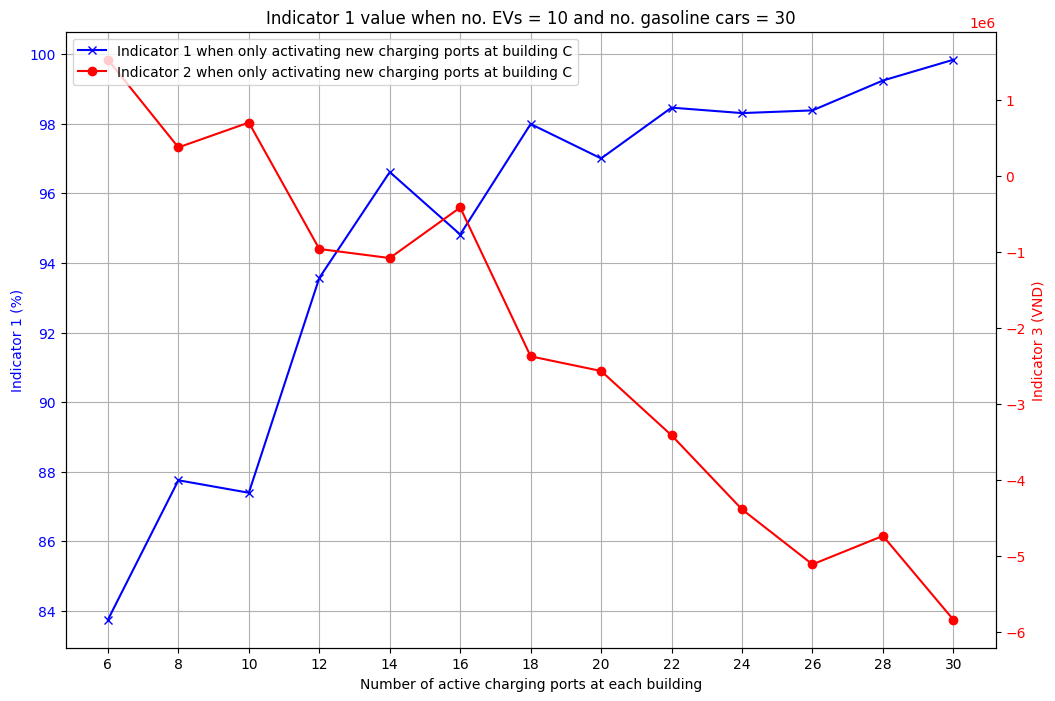

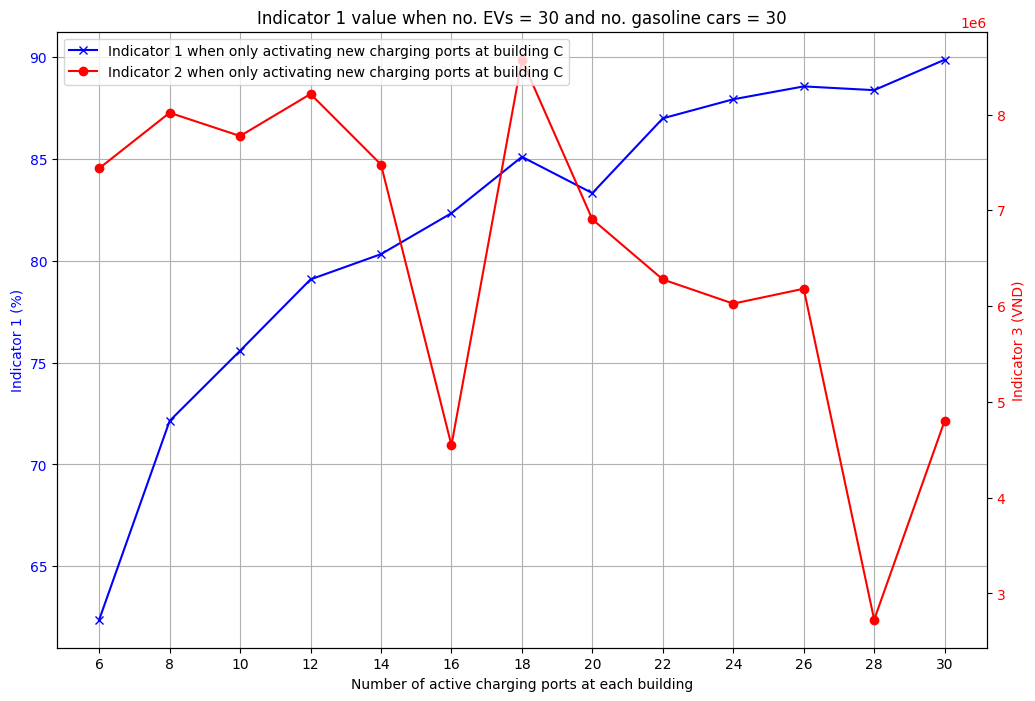

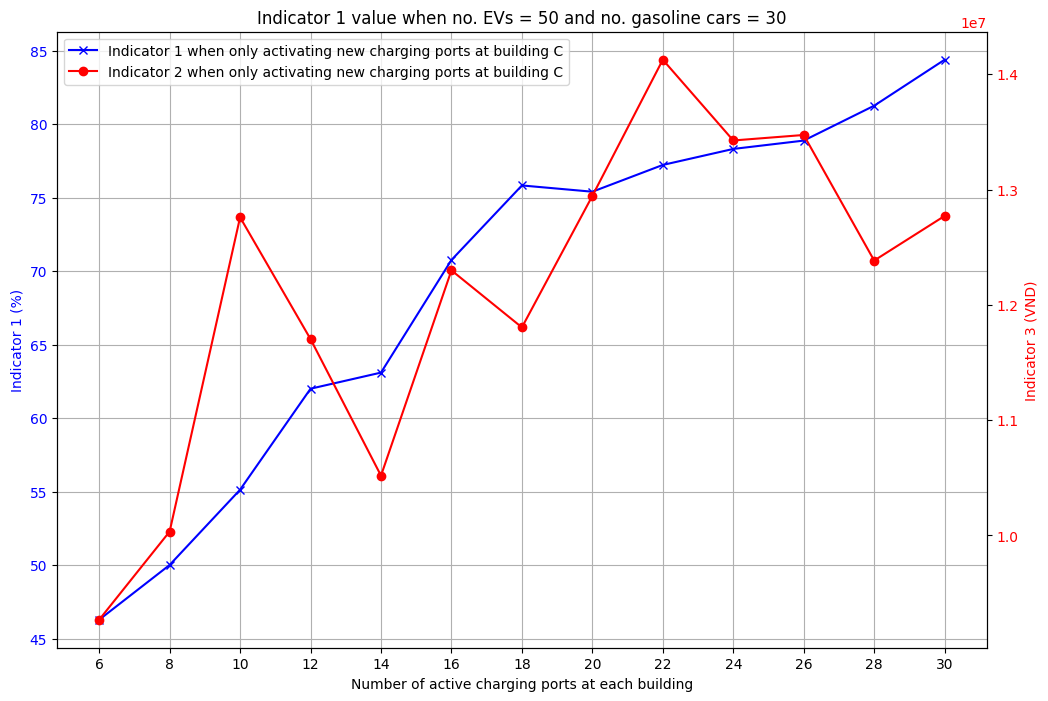

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the new dataset
df = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter1_indi1_CJ.csv')
df = df.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df1 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_False_False.csv')
df1 = df1.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})
input1_values = [10, 30, 50]

for input1 in input1_values:
    subset = df[(df['nb_electrical'] == input1) & (df['nb_activeCS_Jparking'] == 6)]
    mean_output = subset.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset1 = df1[(df1['nb_electrical'] == input1) & (df1['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()


    plt.figure(figsize=(12, 8))

    # Create the first plot with the first y-axis
    ax1 = plt.gca()  # Get the current Axes instance on the current figure
    ax1.plot(mean_output['nb_activeCS_Cparking'], 100*mean_output['avg_statisfied_day'], marker='x', color='blue', label='Indicator 1 when only activating new charging ports at building C')
    ax1.set_xlabel('Number of active charging ports at each building')
    ax1.set_ylabel('Indicator 1 (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Indicator 1 value when no. EVs = {input1} and no. gasoline cars = 30')
    ax1.set_xticks(range(6, 31, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    ax1.grid(True)

    # Create the second plot with a secondary y-axis
    ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
    ax2.plot(mean_output1['nb_activeCS_Cparking'], mean_output1['monthly_profit'], marker='o', color='red', label='Indicator 2 when only activating new charging ports at building C')
    ax2.set_ylabel('Indicator 3 (VND)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Alternative 2 Effectiveness

This part examines the effectivesness of implementing 2 levels of policy on VinUni campus, indicated by 3 indicators.

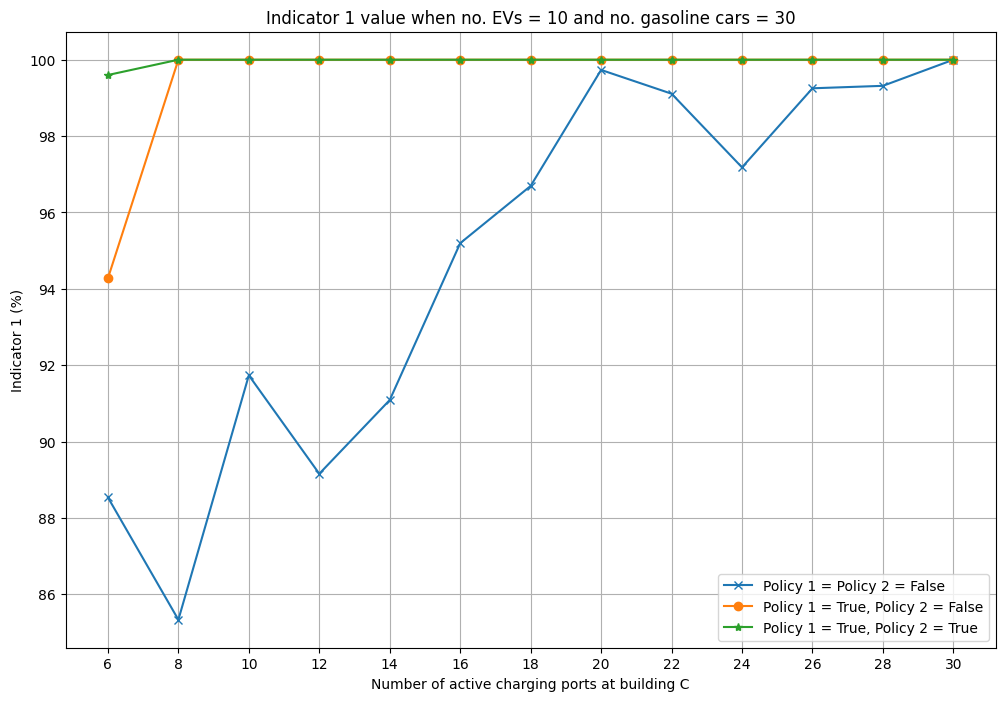

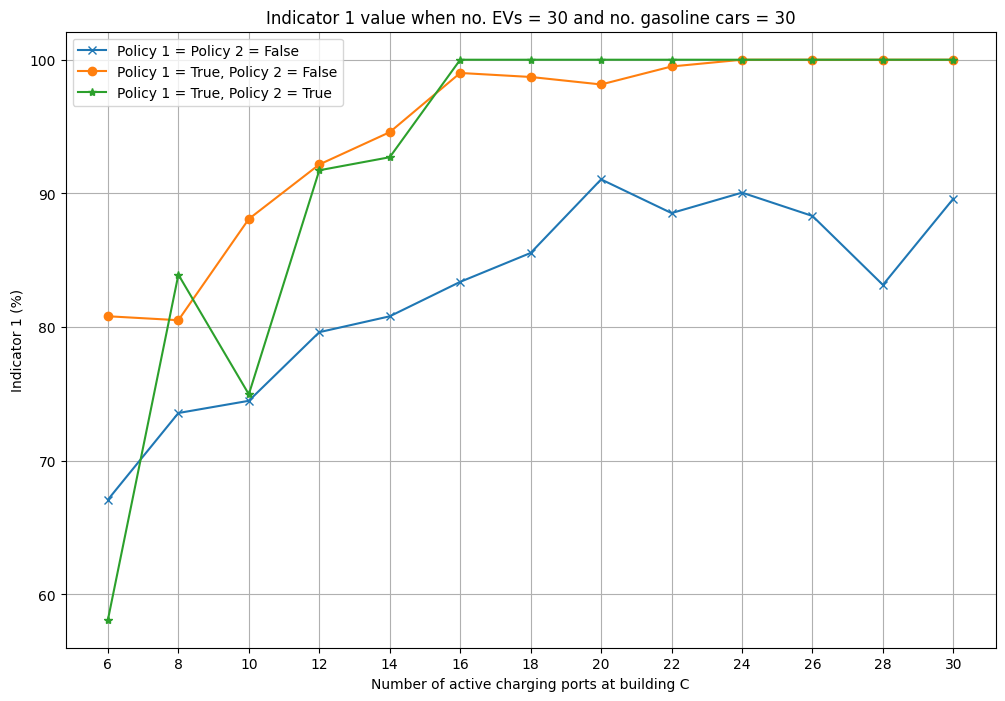

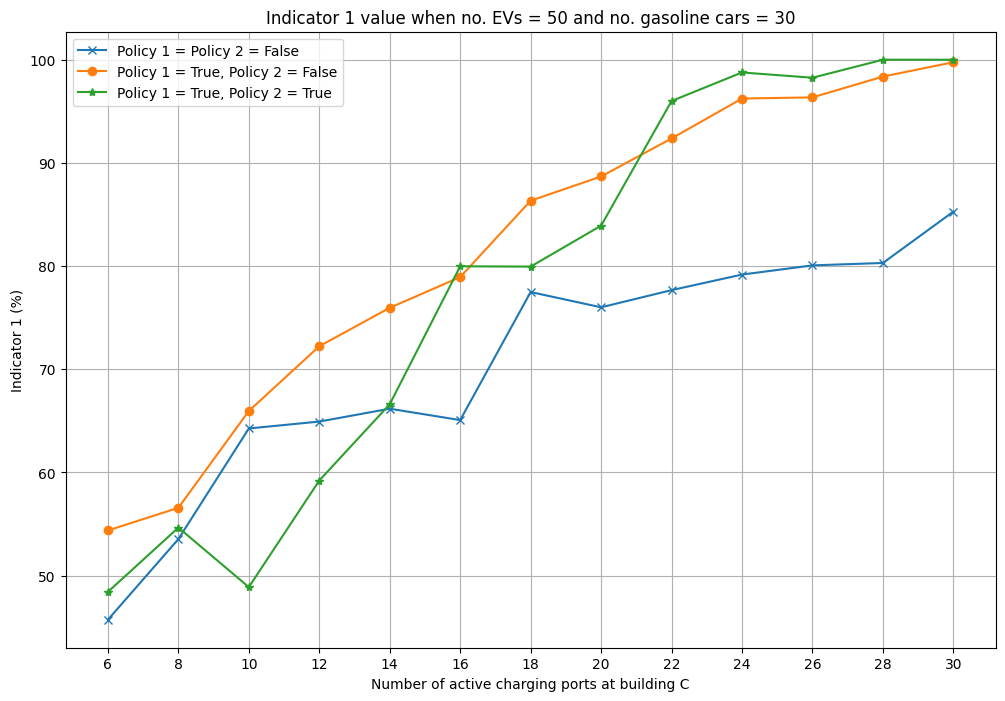

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the new dataset
df1 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_False_False.csv')
df1 = df1.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df2 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_False.csv')
df2 = df2.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df3 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_True.csv')
df3 = df3.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

input1_values = [10,30,50]

for input1 in input1_values:
    # Subset for the first dataset
    subset1= df1[(df1['nb_electrical'] == input1) & (df1['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    # Subset for the second dataset
    subset2= df2[(df2['nb_electrical'] == input1) & (df2['nb_activeCS_Jparking'] == 6)]
    mean_output2 = subset2.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    # Subset for the new dataset where nb_activeCS_Cparking equals nb_activeCS_Jparking
    subset3 = df3[(df3['nb_electrical'] == input1) & (df3['nb_activeCS_Jparking'] == 6)]
    mean_output3 = subset3.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    # Plot for the first dataset
    plt.figure(figsize=(12, 8))
    plt.plot(mean_output1['nb_activeCS_Cparking'], 100*mean_output1['avg_statisfied_day'], marker='x', label='Policy 1 = Policy 2 = False')

    # Plot for the second dataset
    plt.plot(mean_output2['nb_activeCS_Cparking'], 100*mean_output2['avg_statisfied_day'], marker='o', label='Policy 1 = True, Policy 2 = False')

    # Plot for the new dataset
    plt.plot(mean_output3['nb_activeCS_Cparking'], 100*mean_output3['avg_statisfied_day'], marker='*', linestyle='-', label='Policy 1 = True, Policy 2 = True')

    plt.xlabel('Number of active charging ports at building C')
    plt.ylabel('Indicator 1 (%)')
    plt.title(f'Indicator 1 value when no. EVs = {input1} and no. gasoline cars = 30')
    plt.xticks(range(6, 31, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    plt.legend()
    plt.grid(True)
    plt.show()


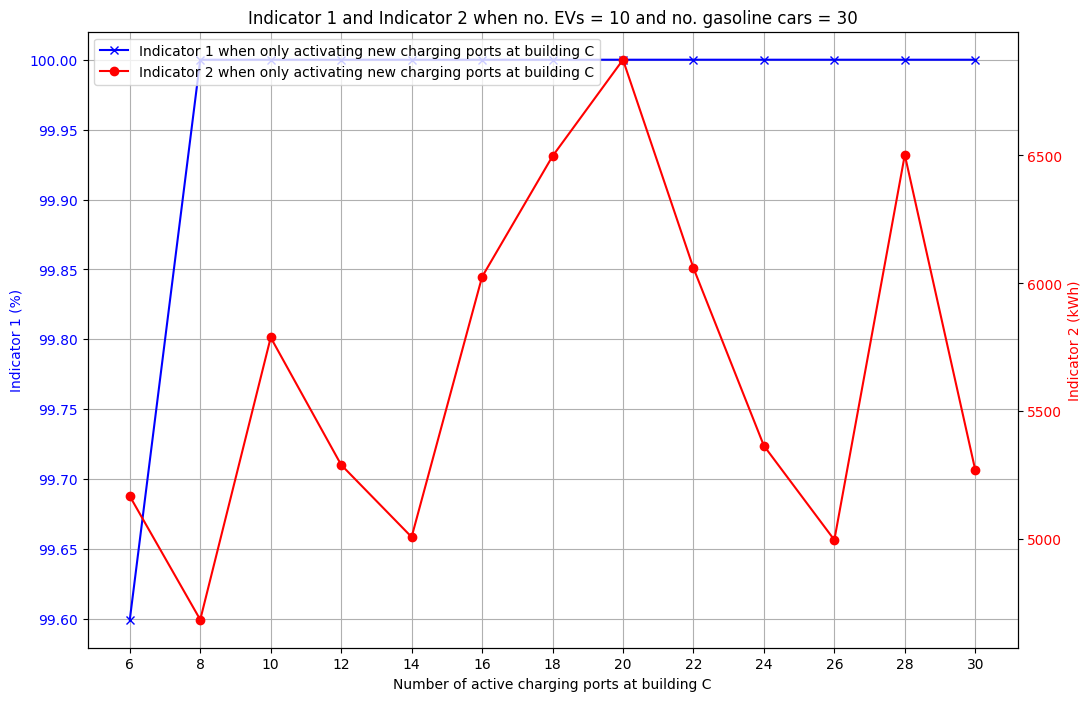

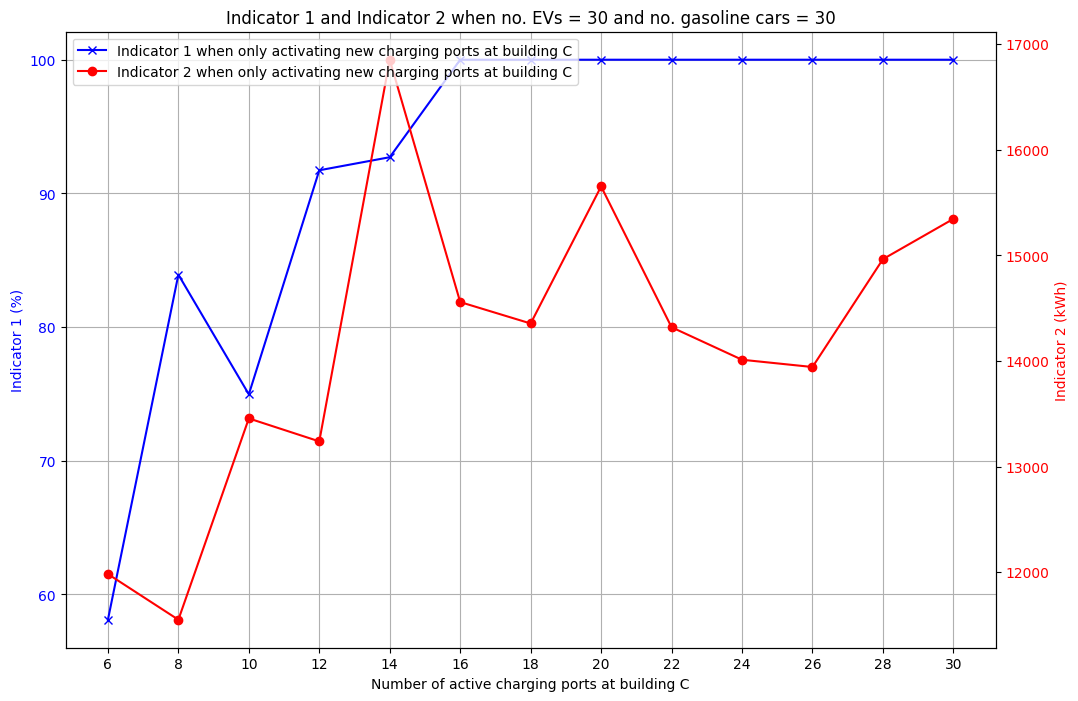

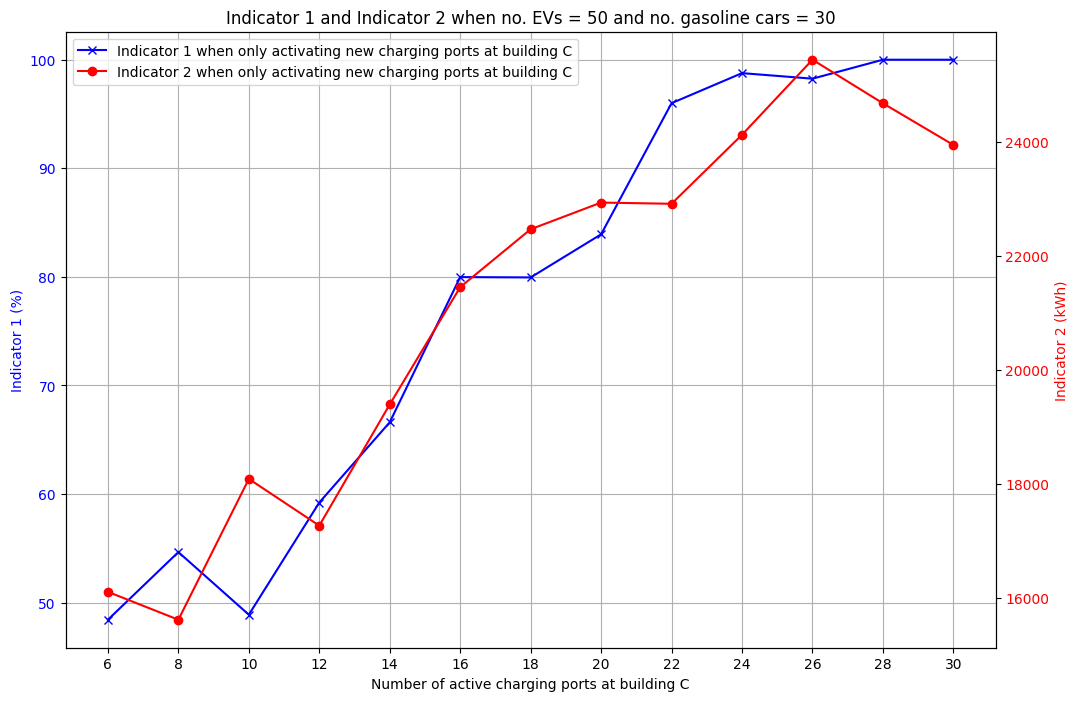

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the new dataset
df1 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_False_False.csv')
df1 = df1.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df2 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_False.csv')
df2 = df2.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df3 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_True.csv')
df3 = df3.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})
input1_values = [10, 30, 50]

for input1 in input1_values:
    subset1 = df1[(df1['nb_electrical'] == input1) & (df1['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset2 = df2[(df2['nb_electrical'] == input1) & (df2['nb_activeCS_Jparking'] == 6)]
    mean_output2 = subset2.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset3 = df3[(df3['nb_electrical'] == input1) & (df3['nb_activeCS_Jparking'] == 6)]
    mean_output3 = subset3.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    plt.figure(figsize=(12, 8))

    # Create the first plot with the first y-axis
    ax1 = plt.gca()  # Get the current Axes instance on the current figure
    ax1.plot(mean_output3['nb_activeCS_Cparking'], 100*mean_output3['avg_statisfied_day'], marker='x', color='blue', label='Indicator 1 when only activating new charging ports at building C')
    ax1.set_xlabel('Number of active charging ports at building C')
    ax1.set_ylabel('Indicator 1 (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Indicator 1 and Indicator 2 when no. EVs = {input1} and no. gasoline cars = 30')
    ax1.set_xticks(range(6, 31, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    ax1.grid(True)

    # Create the second plot with a secondary y-axis
    ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
    ax2.plot(mean_output3['nb_activeCS_Cparking'], mean_output3['monthly_energy_consumption'], marker='o', color='red', label='Indicator 2 when only activating new charging ports at building C')
    ax2.set_ylabel('Indicator 2 (kWh)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

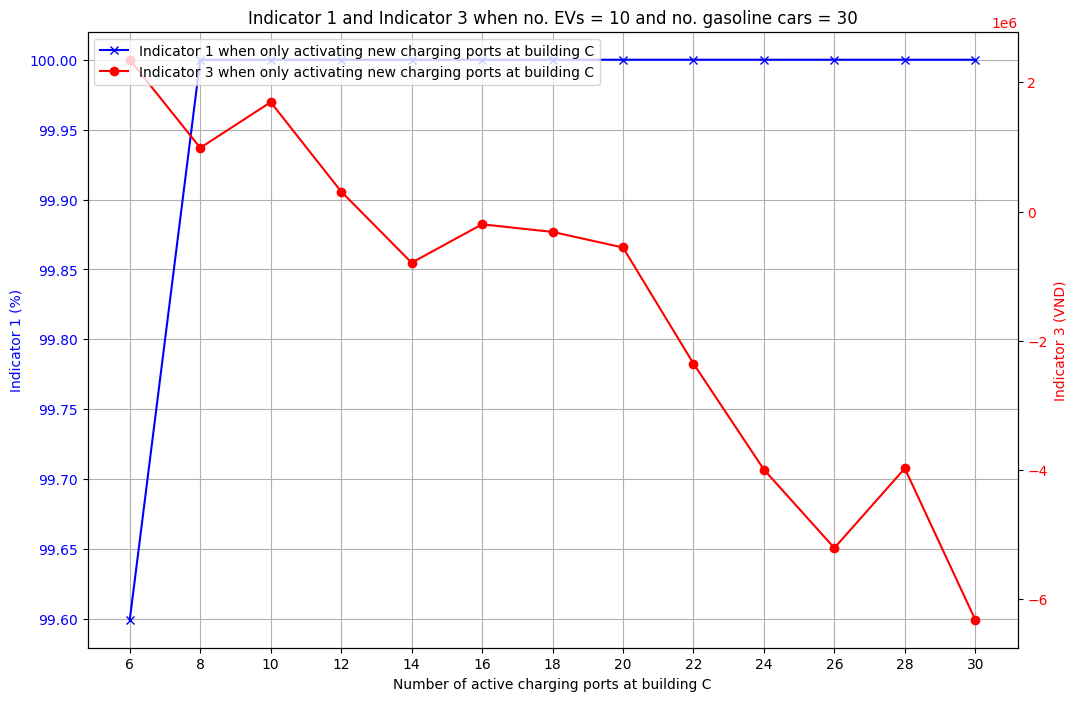

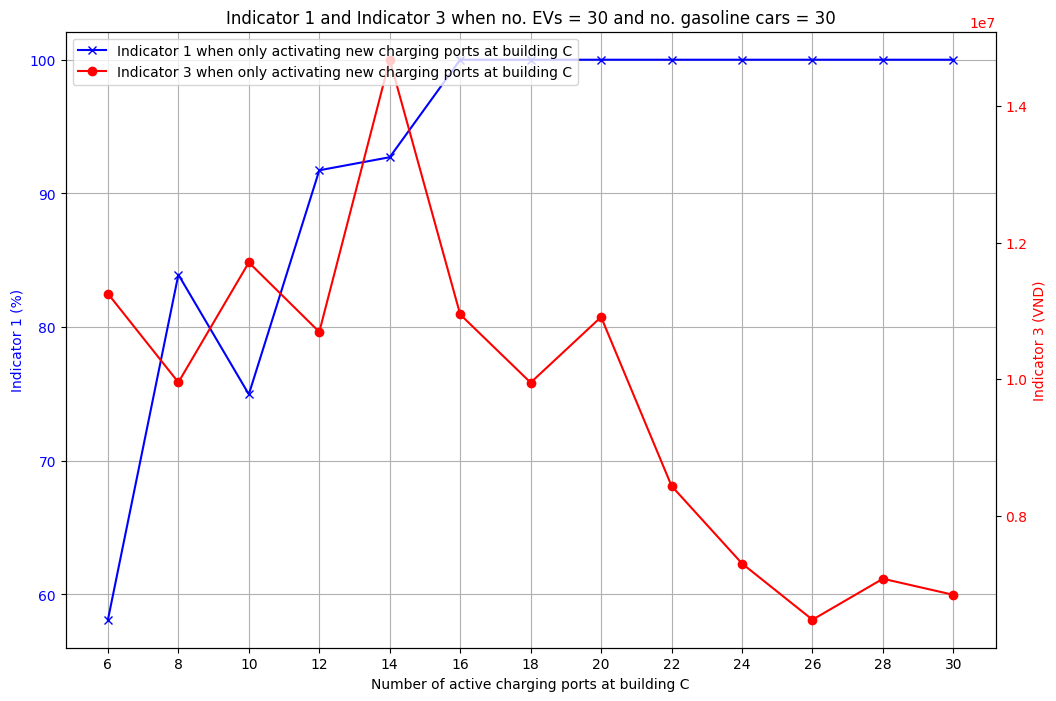

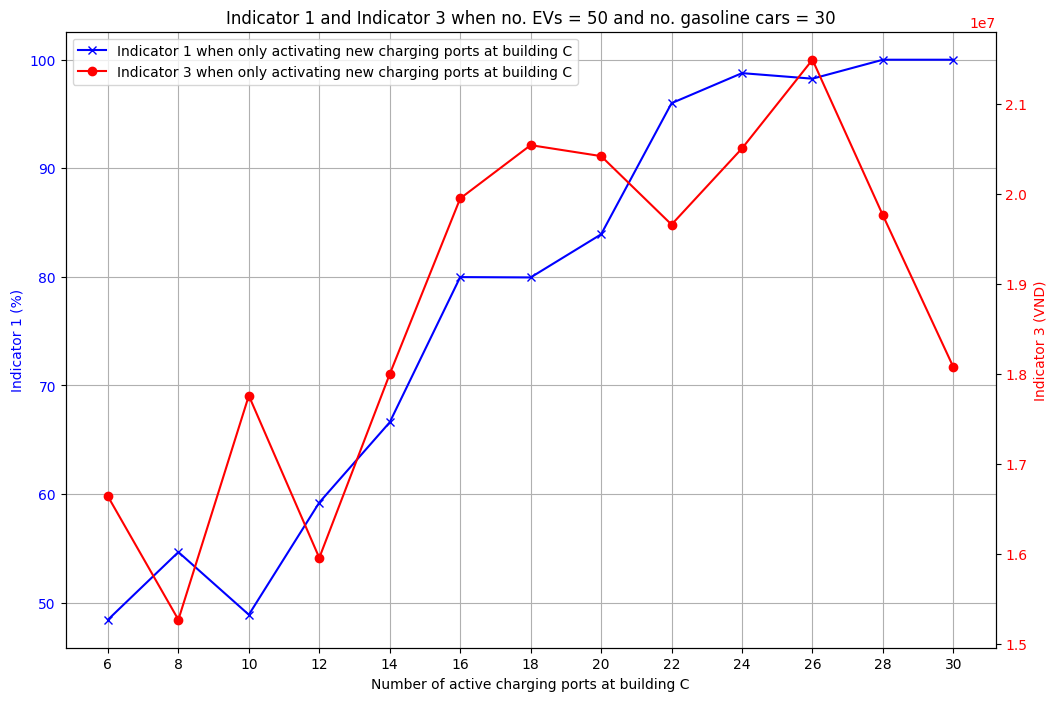

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess the new dataset
df1 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_False_False.csv')
df1 = df1.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df2 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_False.csv')
df2 = df2.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})

df3 = pd.read_csv('Capstone_DigitalTwin/simulation_data/exploration_alter2_True_True.csv')
df3 = df3.rename(columns={'self.avg_statisfied_day': 'avg_statisfied_day',
                          'self.nb_electrical': 'nb_electrical',
                          'self.nb_activeCS_Cparking': 'nb_activeCS_Cparking',
                          'self.nb_activeCS_Jparking': 'nb_activeCS_Jparking',
                          'self.monthly_energy_consumption': 'monthly_energy_consumption',
                          'self.monthly_profit': 'monthly_profit'})
input1_values = [10, 30, 50]

for input1 in input1_values:
    subset1 = df1[(df1['nb_electrical'] == input1) & (df1['nb_activeCS_Jparking'] == 6)]
    mean_output1 = subset1.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset2 = df2[(df2['nb_electrical'] == input1) & (df2['nb_activeCS_Jparking'] == 6)]
    mean_output2 = subset2.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    subset3 = df3[(df3['nb_electrical'] == input1) & (df3['nb_activeCS_Jparking'] == 6)]
    mean_output3 = subset3.groupby('nb_activeCS_Cparking').mean(numeric_only=True).reset_index()

    plt.figure(figsize=(12, 8))

    # Create the first plot with the first y-axis
    ax1 = plt.gca()  # Get the current Axes instance on the current figure
    ax1.plot(mean_output3['nb_activeCS_Cparking'], 100*mean_output3['avg_statisfied_day'], marker='x', color='blue', label='Indicator 1 when only activating new charging ports at building C')
    ax1.set_xlabel('Number of active charging ports at building C')
    ax1.set_ylabel('Indicator 1 (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Indicator 1 and Indicator 3 when no. EVs = {input1} and no. gasoline cars = 30')
    ax1.set_xticks(range(6, 31, 2))  # Adjusting x-axis ticks for the range from 6 to 30
    ax1.grid(True)

    # Create the second plot with a secondary y-axis
    ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
    ax2.plot(mean_output3['nb_activeCS_Cparking'], mean_output3['monthly_profit'], marker='o', color='red', label='Indicator 3 when only activating new charging ports at building C')
    ax2.set_ylabel('Indicator 3 (VND)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()